In [1]:
using Plots 
using Statistics
using Distributions
using Flux 

Papers: 
- https://arxiv.org/pdf/2206.11810.pdf
- https://arxiv.org/pdf/2107.07511.pdf

In [2]:
# let's create a function that will predict the 
n_train= 2000;

X = 2 .* (rand(2,n_train) .- 0.5);

x = @view X[1,:]
y = @view X[2,:]

z = x.^5 .+ y.^4 .- x.^4 .- y.^3 ;

In [3]:
Xtrain = X[:, 1:1500];
Ytrain = z[1:1500];

Xcal = X[:, 1501:1750];
Ycal = z[1501:1750];

Xtest = X[:, 1751:end];
Ytest = z[1751:end];

println(size(Xtrain), " ", size(Xcal), " ", size(Xtest))

(2, 1500) (2, 250) (2, 250)


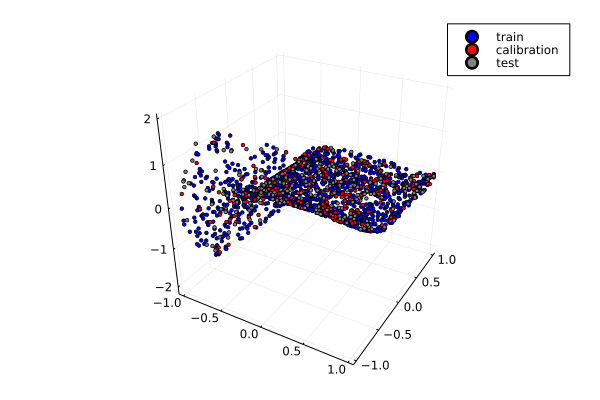

In [4]:
p = plot(Xtrain[1,:], Xtrain[2,:], Ytrain, seriestype = :scatter, color=:blue, ms = 2,label="train")
plot!(p, Xcal[1,:], Xcal[2,:], Ycal, seriestype = :scatter, color=:red, ms=2, label="calibration")
plot!(p, Xtest[1,:], Xtest[2,:], Ytest, seriestype = :scatter, color=:gray, ms=2, label="test")

display(p)

1. Fit a neural network to the training data using pinball loss to predict quantiles. 

In [5]:
model = Chain(
    Dense(2 => 3, σ), 
    Dense(3 => 3)
)

Chain(
  Dense(2 => 3, σ),                     # 9 parameters
  Dense(3 => 3),                        # 12 parameters
)                   # Total: 4 arrays, 21 parameters, 340 bytes.

In [6]:
# test it out 
model(Xtest[:,1:10])

3×10 Matrix{Float64}:
  0.353468     0.333655    0.299828  …   0.33043     0.40266    0.307626
 -0.216269    -0.252233   -0.342115     -0.272104   -0.130492  -0.326592
  0.00151364   0.0606849  -0.120828     -0.0571458  -0.12226   -0.125202

In [7]:
function ℓ_pinball(ŷ,y, ϵ)
    return maximum([ϵ(y-ŷ), (ϵ-1)*(y-ŷ)])
end

ℓ_pinball (generic function with 1 method)

In [8]:
ℓ_pinball(5,5.5, 0.5)

LoadError: MethodError: objects of type Float64 are not callable
Maybe you forgot to use an operator such as [36m*, ^, %, / etc. [39m?